## Информация проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание данных:

 - Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана
 - Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок
 - Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение
 - Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя
 - Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Описание тарифов:

1. Тариф «Смарт»:
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


2. Тариф «Ультра»:
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import seaborn as sns

In [2]:
calls = pd.read_csv("/datasets/calls.csv")
internet = pd.read_csv("/datasets/internet.csv", index_col=0)
messages = pd.read_csv("/datasets/messages.csv")
tarif = pd.read_csv("/datasets/tariffs.csv")
users = pd.read_csv("/datasets/users.csv")

### Информация о звонках

In [3]:
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


### Информация об интернет-сессиях

In [4]:
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


### Информация о сообщениях

In [5]:
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


### Информация о тарифах

In [6]:
tarif.info()
tarif.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Информация о пользователях

In [7]:
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Вывод
1. Во всех таблицах формат даты не соответствует типу данных.
2. В таблице USERS в столбце `churn_date` пропущены данные, но это связано с тем, что тариф все еще действует

## Подготовка данных

### Поменяем формат дат

In [8]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format = "%Y-%m-%d")
internet["session_date"] = pd.to_datetime(internet["session_date"], format = "%Y-%m-%d")
messages["message_date"] = pd.to_datetime(messages["message_date"], format = "%Y-%m-%d")
users["reg_date"] = pd.to_datetime(users["reg_date"], format = "%Y-%m-%d")
users["churn_date"] = pd.to_datetime(users["churn_date"], format = "%Y-%m-%d")

### Добавим колонки с месяцем

In [9]:
calls["month"] = calls["call_date"].dt.month
internet["month"] = internet["session_date"].dt.month
messages["month"] = messages["message_date"].dt.month

### Округлим значения длительности звонков

In [10]:
def okruglenie(row):
    return math.ceil(row)
calls["duration"] = calls["duration"].apply(okruglenie)
#internet["mb_used"] = internet["mb_used"].apply(okruglenie)

### Расчет данных для каждого пользователя по месяцам

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [11]:
df_calls = calls.merge(users,on="user_id")

In [12]:
calls_pivot = pd.pivot_table(df_calls,index=["user_id","month"],values="duration",aggfunc={"count","sum"})
calls_pivot.columns =["Количетсво звонков","Длительность"]
calls_pivot

Количетсво звонков  Длительность
user_id month                                  
1000    5                      22           159
        6                      43           172
        7                      47           340
        8                      52           408
        9                      58           466
...                           ...           ...
1498    10                     41           247
1499    9                       9            70
        10                     68           449
        11                     74           612
        12                     69           492

[3174 rows x 2 columns]

#### Количество отправленных сообщений по месяцам;

In [13]:
df_messages = messages.merge(users,on="user_id")

In [14]:
messages_pivot = pd.pivot_table(df_messages,index=["user_id","month"],values="id",aggfunc="count")
messages_pivot.columns =["Количетсво сообщений"]
messages_pivot

Количетсво сообщений
user_id month                      
1000    5                        22
        6                        60
        7                        75
        8                        81
        9                        57
...                             ...
1498    10                       42
1499    9                        11
        10                       48
        11                       59
        12                       66

[2717 rows x 1 columns]

#### Объем израсходованного интернет-трафика по месяцам

In [15]:
df_internet = internet.merge(users,on="user_id")

In [16]:
internet_pivot = pd.pivot_table(df_internet,index=["user_id","month"],values="mb_used",aggfunc="sum")
internet_pivot.columns =["Объём потраченного за сессию интернет-трафика"]
internet_pivot

Объём потраченного за сессию интернет-трафика
user_id month                                               
1000    5                                            2253.49
        6                                           23233.77
        7                                           14003.64
        8                                           14055.93
        9                                           14568.91
...                                                      ...
1498    10                                          20579.36
1499    9                                            1845.75
        10                                          17788.51
        11                                          17963.31
        12                                          13055.58

[3203 rows x 1 columns]

#### Объединение полученных таблиц

In [17]:
data_all = pd.concat([calls_pivot,messages_pivot,internet_pivot],axis=1)

### Обработка нулей и типа данных в таблице

In [18]:
data_all.isna().sum()

Количетсво звонков                                40
Длительность                                      40
Количетсво сообщений                             497
Объём потраченного за сессию интернет-трафика     11
dtype: int64

In [19]:
data_all['Количетсво звонков'] = data_all['Количетсво звонков'].fillna(0)
data_all['Количетсво звонков'] = data_all['Количетсво звонков'].astype("int")

In [20]:
data_all['Длительность'] = data_all['Длительность'].fillna(0)
data_all['Длительность'] = data_all['Длительность'].astype("int")

In [21]:
data_all['Количетсво сообщений'] = data_all['Количетсво сообщений'].fillna(0)
data_all['Количетсво сообщений'] = data_all['Количетсво сообщений'].astype("int")

In [22]:
data_all['Объём потраченного за сессию интернет-трафика'] = data_all['Объём потраченного за сессию интернет-трафика'].fillna(0)
data_all['Объём потраченного за сессию интернет-трафика'] = data_all['Объём потраченного за сессию интернет-трафика'].astype("int")

In [23]:
data_all.isna().sum()

Количетсво звонков                               0
Длительность                                     0
Количетсво сообщений                             0
Объём потраченного за сессию интернет-трафика    0
dtype: int64

In [24]:
data_all.head(20)

Количетсво звонков  Длительность  Количетсво сообщений  \
user_id month                                                           
1000    5                      22           159                    22   
        6                      43           172                    60   
        7                      47           340                    75   
        8                      52           408                    81   
        9                      58           466                    57   
        10                     57           350                    73   
        11                     43           338                    58   
        12                     46           333                    70   
1001    11                     59           430                     0   
        12                     63           414                     0   
1002    6                      15           117                     4   
        7                      26           214                    11   
        8                      42           289                    13   
        9                      36           206                     4   
        10                     33           212                    10   
        11                     32           243                    16   
        12                     33           236                    12   
1003    8                      55           380                    37   
        9                     134           961                    91   
        10                    108           855                    83   

               Объём потраченного за сессию интернет-трафика  
user_id month                                                 
1000    5                                               2253  
        6                                              23233  
        7                                              14003  
        8                                              14055  
        9                                              14568  
        10                                             14702  
        11                                             14756  
        12                                              9817  
1001    11                                             18429  
        12                                             14036  
1002    6                                              10856  
        7                                              17580  
        8                                              20319  
        9                                              16691  
        10                                             13888  
        11                                             18587  
        12                                             18113  
1003    8                                               8565  
        9                                              12468  
        10                                             14768

In [25]:
for user in data_all.index:
    data_all.loc[user, 'Тариф'] = users.loc[user[0]-1000, 'tariff']

In [26]:
data_all

Количетсво звонков  Длительность  Количетсво сообщений  \
user_id month                                                           
1000    5                      22           159                    22   
        6                      43           172                    60   
        7                      47           340                    75   
        8                      52           408                    81   
        9                      58           466                    57   
...                           ...           ...                   ...   
1498    10                     41           247                    42   
1499    9                       9            70                    11   
        10                     68           449                    48   
        11                     74           612                    59   
        12                     69           492                    66   

               Объём потраченного за сессию интернет-трафика  Тариф  
user_id month                                                        
1000    5                                               2253  ultra  
        6                                              23233  ultra  
        7                                              14003  ultra  
        8                                              14055  ultra  
        9                                              14568  ultra  
...                                                      ...    ...  
1498    10                                             20579  smart  
1499    9                                               1845  smart  
        10                                             17788  smart  
        11                                             17963  smart  
        12                                             13055  smart  

[3214 rows x 5 columns]

In [27]:
tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
def raschet(row):
    calls = row["Количетсво звонков"]
    duration = row["Длительность"]
    message = row["Количетсво сообщений"]
    internet = row["Объём потраченного за сессию интернет-трафика"]
    tariff = row['Тариф']    
    
    
    if tariff == "smart":
        # Если зачение переменной меньше 0 или равняется 0, то пакет опицй еще не полностью был использован
        sverx_calls = duration - tarif.loc[0,"minutes_included"]
        if sverx_calls < 0:
            sverx_calls = 0
        sverx_message = message - tarif.loc[0,"messages_included"]
        if sverx_message < 0:
            sverx_message = 0
        extra_internet = internet - tarif.loc[0,"mb_per_month_included"]
        if extra_internet < 0:
            extra_internet = 0
        
        viruchka = (tarif.loc[0,"rub_monthly_fee"]
                    + tarif.loc[0,"rub_per_message"]*sverx_message
                    + tarif.loc[0,"rub_per_minute"]*sverx_calls
                    + np.ceil((tarif.loc[0,"rub_per_gb"] / 1024)*extra_internet))
        return viruchka
    
    else:
        sverx_calls = duration - tarif.loc[1,"minutes_included"]
        if sverx_calls < 0:
            sverx_calls = 0
        sverx_message = message - tarif.loc[1,"messages_included"]
        if sverx_message < 0:
            sverx_message = 0
        extra_internet = internet - tarif.loc[1,"mb_per_month_included"]
        if extra_internet < 0:
            extra_internet = 0
         

        viruchka = (tarif.loc[1,"rub_monthly_fee"]
                    + tarif.loc[1,"rub_per_message"]*sverx_message
                    + tarif.loc[1,"rub_per_minute"]*sverx_calls
                    + np.ceil((tarif.loc[1,"rub_per_gb"] / 1024)*extra_internet))
        return viruchka
    

In [29]:
data_all["Прибыль"] = data_all.apply(raschet, axis = 1)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Количетсво звонков                             3214 non-null   int64  
 1   Длительность                                   3214 non-null   int64  
 2   Количетсво сообщений                           3214 non-null   int64  
 3   Объём потраченного за сессию интернет-трафика  3214 non-null   int64  
 4   Тариф                                          3214 non-null   object 
 5   Прибыль                                        3214 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 309.7+ KB


In [30]:
data_all.head(20)

Количетсво звонков  Длительность  Количетсво сообщений  \
user_id month                                                           
1000    5                      22           159                    22   
        6                      43           172                    60   
        7                      47           340                    75   
        8                      52           408                    81   
        9                      58           466                    57   
        10                     57           350                    73   
        11                     43           338                    58   
        12                     46           333                    70   
1001    11                     59           430                     0   
        12                     63           414                     0   
1002    6                      15           117                     4   
        7                      26           214                    11   
        8                      42           289                    13   
        9                      36           206                     4   
        10                     33           212                    10   
        11                     32           243                    16   
        12                     33           236                    12   
1003    8                      55           380                    37   
        9                     134           961                    91   
        10                    108           855                    83   

               Объём потраченного за сессию интернет-трафика  Тариф  Прибыль  
user_id month                                                                 
1000    5                                               2253  ultra   1950.0  
        6                                              23233  ultra   1950.0  
        7                                              14003  ultra   1950.0  
        8                                              14055  ultra   1950.0  
        9                                              14568  ultra   1950.0  
        10                                             14702  ultra   1950.0  
        11                                             14756  ultra   1950.0  
        12                                              9817  ultra   1950.0  
1001    11                                             18429  smart   1150.0  
        12                                             14036  smart    550.0  
1002    6                                              10856  smart    550.0  
        7                                              17580  smart    984.0  
        8                                              20319  smart   1519.0  
        9                                              16691  smart    810.0  
        10                                             13888  smart    550.0  
        11                                             18587  smart   1181.0  
        12                                             18113  smart   1088.0  
1003    8                                               8565  ultra   1950.0  
        9                                              12468  ultra   1950.0  
        10                                             14768  ultra   1950.0

In [31]:
data_all_mediana = data_all.pivot_table(index='user_id', values=['Длительность', 'Количетсво сообщений', 'Объём потраченного за сессию интернет-трафика', 'Прибыль'], aggfunc='median')
for user_id in users['user_id']:
    data_all_mediana.loc[user_id, 'Тариф'] = users.loc[user_id-1000, 'tariff']
data_all_mediana.head()

,Длительность,Количетсво сообщений,Объём потраченного за сессию интернет-трафика,Прибыль,Тариф
user_id,,,,,
1000,339.0,65.0,14311.5,1950.0,ultra
1001,422.0,0.0,16232.5,850.0,smart
1002,214.0,11.0,17580.0,984.0,smart
1003,824.0,83.0,11356.0,1950.0,ultra
1004,132.5,154.5,17810.5,1950.0,ultra


### Расчет среднего количества, дисперсии и стандартного отклонения

In [32]:
stat_data_median = (data_all_mediana
             .pivot_table
             (index=['Тариф'], 
              values=['Длительность', 'Объём потраченного за сессию интернет-трафика', 'Количетсво сообщений'], 
              aggfunc={'Длительность': [np.median, np.var, np.std], 
                       'Объём потраченного за сессию интернет-трафика': [np.median, np.var, np.std], 
                       'Количетсво сообщений': [np.median, np.var, np.std]}
             )
            )

In [33]:
stat_data_median

Длительность                           Количетсво сообщений             \
            median         std           var               median        std   
Тариф                                                                          
smart       439.75  160.266622  25685.390127                 28.5  28.010653   
ultra       535.25  303.793641  92290.576519                 47.5  49.236809   

                   Объём потраченного за сессию интернет-трафика               \
               var                                        median          std   
Тариф                                                                           
smart   784.596662                                      16924.75  4174.206306   
ultra  2424.263318                                      19732.75  8893.008111   

                     
                var  
Тариф                
smart  1.742400e+07  
ultra  7.908559e+07

In [34]:
stat_data = (data_all
             .pivot_table
             (index=['Тариф'], 
              values=['Длительность', 'Объём потраченного за сессию интернет-трафика', 'Количетсво сообщений'], 
              aggfunc={'Длительность': [np.median, np.var, np.std], 
                       'Объём потраченного за сессию интернет-трафика': [np.median, np.var, np.std], 
                       'Количетсво сообщений': [np.median, np.var, np.std]}
             )
            )

In [35]:
stat_data

Длительность                            Количетсво сообщений             \
            median         std            var               median        std   
Тариф                                                                           
smart        422.0  190.313730   36219.315784                 28.0  28.227876   
ultra        518.0  317.606098  100873.633397                 38.0  47.804457   

                   Объём потраченного за сессию интернет-трафика  \
               var                                        median   
Тариф                                                              
smart   796.812958                                       16506.0   
ultra  2285.266143                                       19308.0   

                                   
                std           var  
Тариф                              
smart   5870.480175  3.446254e+07  
ultra  10087.173788  1.017511e+08

## Анализ данных

### Анализ данных - boxplot

Общая длительность звонков в тарифе Ультра не доходит до своего лимита
Количество сообщений в тарифе Ультра не доходит до своего лимита


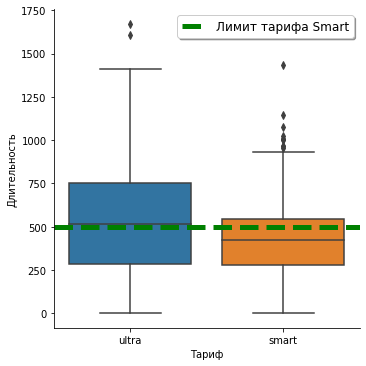

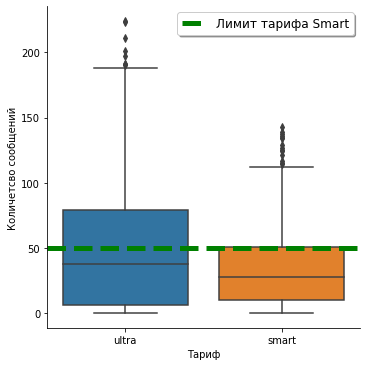

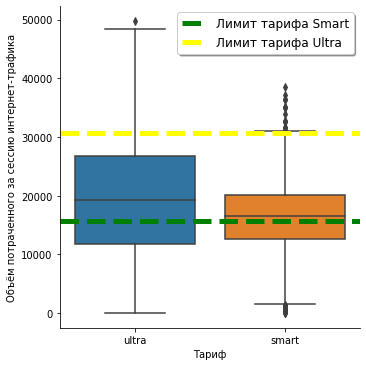

In [36]:
for column in ['Длительность', 'Количетсво сообщений', 'Объём потраченного за сессию интернет-трафика']:    
    sns.catplot(x="Тариф", y=column, kind="box", data=data_all, orient='v')
    if column == 'Длительность':
        plt.axhline(y=500, color="green", linestyle="--",linewidth=5, label="Лимит тарифа Smart")
        #plt.axhline(y=3000, color="yellow", linestyle="--",linewidth=5, label="Лимит тарифа Ultra")
        print("Общая длительность звонков в тарифе Ультра не доходит до своего лимита")
    if column == 'Количетсво сообщений':
        plt.axhline(y=50, color="green", linestyle="--",linewidth=5, label="Лимит тарифа Smart")
        #plt.axhline(y=1000, color="yellow", linestyle="--",linewidth=5, label="Лимит тарифа Ultra")
        print("Количество сообщений в тарифе Ультра не доходит до своего лимита")
    if column == 'Объём потраченного за сессию интернет-трафика':
        plt.axhline(y=15630, color="green", linestyle="--",linewidth=5, label="Лимит тарифа Smart")
        plt.axhline(y=30720, color="yellow", linestyle="--",linewidth=5, label="Лимит тарифа Ultra")
    plt.legend(loc="upper right",shadow=True,fontsize="large")

### Анализ данных - histplot

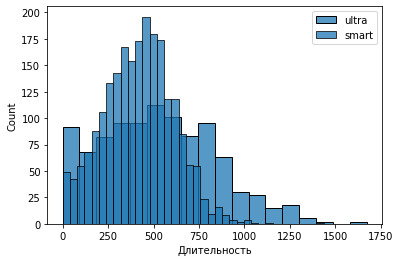

In [37]:
for tariff in ['ultra', 'smart']:
    sns.histplot(data_all.query('Тариф == @tariff')['Длительность'])
    plt.legend(['ultra', 'smart'])

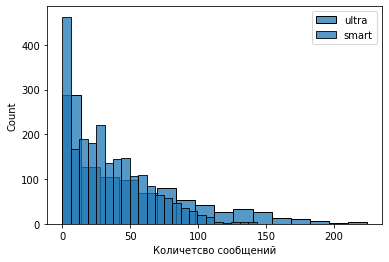

In [39]:
for tariff in ['ultra', 'smart']:
    sns.histplot(data_all.query('Тариф == @tariff')['Количетсво сообщений'])
    plt.legend(['ultra', 'smart'])

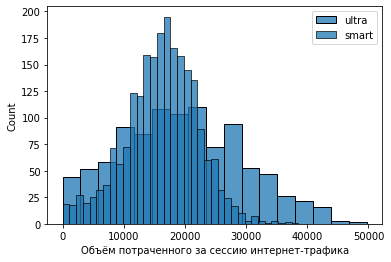

In [45]:
for tariff in ['ultra', 'smart']:
    sns.histplot(data_all.query('Тариф == @tariff')['Объём потраченного за сессию интернет-трафика'])
    plt.legend(['ultra', 'smart'])

### Вывод

 - Длительность звонков:
* Для тарифа ультра пользователи не доходят до своего лимита тарифа, при этом среднее значение звонков пользователей в месяц состовляет около 580 минут.
* Что касаеься пользователей тарифа смарт, то в среднем часть пользователей используют около 500 минут, при этом 30% пользователей выходят за пределы трафика по звонкам.

 - Сообщения:
* Для тарифа ультра пользователи в среднем используют 90 сообщений в меясц. До предела лимита сообщений остается еще огромный запас. При этом больше 40 пользователей не используют сообщения вовсе.
* Для тарифа смарт есть пользователели, котоыре используют весь полученный пакет сообщений. Небольшая часть выходят за пределы и доплачивают за каждое сообщение. Также наблюдаются выбросы по сообщениям пользователей смарт. В тарифе смарт также большое количество пользователей не отправляют сообщения (Около 90).

 - Интернет:
* Для тарифа ультра в среднем используют 20 ГБ, что до лимита остается еще 10Гб. Однако часть пользователей все равно выходит за пределы. Таких пользователей порядка 7%.
* Для тарифа смарт ситуация отличается. В срднем пользователи используют от 14 до 20ГБ в месяц. При этом медиана равна 17ГБ, что превышает лимит тарифа и используют дополнительные Гб за доп. плату.

<AxesSubplot:xlabel='Объём потраченного за сессию интернет-трафика', ylabel='Count'>

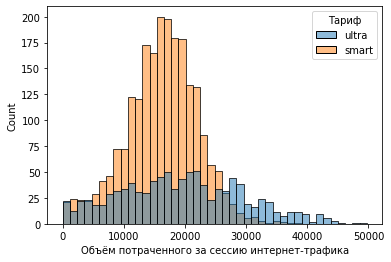

In [41]:
sns.histplot(data = data_all, x = 'Объём потраченного за сессию интернет-трафика', hue='Тариф')

## Проверка гипотез

Гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Гипотеза №1

В качестве 0 предположим, что средняя выручка двух тарифов не отличается, тогда :
- H0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»
- H1  — средняя выручка пользователей тарифа «Ультра» отличается от  средней выручке пользователей тарифа «Смарт»

* Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, так как дисперсии выборок отличаются.
* Критический уровень значимости зададим 0.05.

In [ ]:
ultra = data_all.query('Тариф == "ultra"')["Прибыль"]
smart = data_all.query('Тариф == "smart"')["Прибыль"]
alpha = .05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

In [42]:
data_all.pivot_table(index='Тариф', values='Прибыль', aggfunc='median')

,Прибыль
Тариф,
smart,958.0
ultra,1950.0


(0.0, 4000.0)

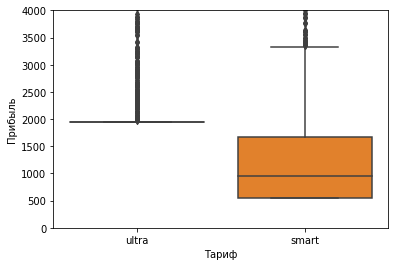

In [43]:
sns.boxplot(x="Тариф", y='Прибыль', data=data_all, orient='v')
plt.ylim(0,4000)

#### Вывод:
Исходя из полученных данных, можно сказать что компания получает больше прибыли от тарифы `Ультра`, чем от тарифа `Смарт`. Ведь разница между абонентсками платами составляет в 3.5 раза. Хоть и пользователи тарифы `Смарт` очень часто выходят за рамки лимитов и покупают дополнительны звонки и интернет (в среднем тратя 400 рублей сверх тарифа), но все равно не достигают прибыли тарифы `Ультра`. 

### Гипотеза №2

#### Добавим в таблицу города.

In [ ]:
for user in data_all.index:
    data_all.loc[user, 'Город'] = users.loc[user[0]-1000, 'city']

#### Проверка гипотезы

В качестве 0 предположим, что средняя выручка двух тарифов от города  не отличаются, тогда :
- H0  — средняя выручка пользователей в Москве равна средней выручке пользователей из другого города;
- H1  — средняя выручка пользователей в Москве отличается от средней выручке пользователей из другого города;

* Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, так как дисперсии выборок отличаются.
* Критический уровень значимости зададим 0.05.

In [ ]:
moscow = data_all.query('Город == "Москва"')["Прибыль"]
region = data_all.query('Город != "Москва"')["Прибыль"]
alpha = .05

results = st.ttest_ind(
    moscow, 
    region, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

In [ ]:
def region(row):
    if row == "Москва":
        return "Москва"
    else:
        return "Другой город"

In [ ]:
data_all["region_pribil"] = data_all['Город'].apply(region)
data_all

In [ ]:
data_all.pivot_table(index='region_pribil', values='Прибыль', aggfunc='median')

In [ ]:
sns.boxplot(x="region_pribil", y='Прибыль', data=data_all, orient='v')
plt.ylim(0,11000)

#### Вывод:
Исходя из полученных данных, можно сказать, что прибыль в зависимости от города сильно не отличаются. В Москве есть небольшое преобладание, но всего в 200 рублей

## Общий вывод

1. Были получены данные по таким составляющим, как информация о звонках, интернет сессиях, сообщениях, тарифах и самих пользователей. 
2. При исследовании данных было выявлено, что в каждой таблице у дат используется не тот формат. Поэтому для начало все даты были приведены в нужный формат.
3. После этого было создана одна общая таблица со всеми нужными параметрами для каждого пользователя по месяцу.
4. При анализе полученных данных, было выявлено что пользователи `Cмарт` часто превышают лимит тарифа по таким показателям, как звонки и интернет, в то время как пользователи `Ультра` часто не доходят до своих лимитов.
5. При проверке гипотез было выявлено, что наибольшую прибыль приносит тариф `Ультра`, чем тариф `Смарт`, хоть пользаватели часто берут дополнительные услуги. В среднем пользователи `Смарт` переплачивают 400 рублей.
6. При рассмотрении прибыли по городам, было выявлено, что между Москвой и другими городами разницы не наблюдается.

В качестве рекомендаций, можно посоветовать компании разработать новый тариф на основе `Смарт` - увеличив число минут и интернет трафика. Так как пользователи `Смарт` часто доплачивают, а пользователи `Ультра` не доходят до своих лимитов, и у них остаются минуты и Гб, которые не переносятся на следующий месяц